<a href="https://colab.research.google.com/github/seonhong416/dadaiksunTeamProject/blob/main/ipynb/%EA%B9%80%EC%84%A0%ED%99%8D/interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
for fontInfo in fm.fontManager.ttflist :
  if 'Nanum' in fontInfo.name :
    print(fontInfo.name+ " = " + fontInfo.fname)

Nanum Brush Script = /usr/share/fonts/truetype/nanum/NanumBrush.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
Nanum Pen Script = /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRound

In [2]:
import matplotlib.font_manager as fm
fm._rebuild()

# 덕수궁

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
덕수궁 = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/DuckSooGung.csv')


In [5]:
덕수궁[덕수궁['최고 기온(°C)']==0] 

,date,month,최고 기온(°C),평균 기온(°C),최소 상대습도(%),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),최대 풍속(m/s),합계 일사량(MJ/m2),0.5m 지중온도(°C),덕수궁


In [6]:
test_df = pd.DataFrame(columns = 덕수궁.columns)

test = 덕수궁.iloc[96, 2 :] - 덕수궁.iloc[95, 2 : ]
test['date'] = 덕수궁['date'][95]
test['month'] = 덕수궁['month'][95]
test = pd.DataFrame(test).T
test
test_df = pd.concat([test_df, test], axis = 0)
test_df

,date,month,최고 기온(°C),평균 기온(°C),최소 상대습도(%),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),최대 풍속(m/s),합계 일사량(MJ/m2),0.5m 지중온도(°C),덕수궁
0,201812.0,12.0,0.0,-0.290323,-0.774194,-0.174194,-2.733333,0.016129,0.487097,0.290323,1.019677,-3.206452,-19283.0


In [7]:
test_df[test_df.columns[2:]] = test_df[test_df.columns[2:]]*2
test_df

,date,month,최고 기온(°C),평균 기온(°C),최소 상대습도(%),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),최대 풍속(m/s),합계 일사량(MJ/m2),0.5m 지중온도(°C),덕수궁
0,201812.0,12.0,0.0,-0.580645,-1.548387,-0.348387,-5.466667,0.032258,0.974194,0.580645,2.039355,-6.412903,-38566.0


In [8]:
덕수궁 = 덕수궁.rename(columns = {'덕수궁' : 'target'})
train = 덕수궁[덕수궁['date'] < 201901]
test = 덕수궁[덕수궁['date'] >= 201901]


In [9]:
# def interpolation(data, n_split) :
#   split_list = []
#   add_data = pd.DataFrame(columns = data.columns)
  
#   # row 끼리 차를 계산해서 split_list에 추가
#   for i in range(len(data) - 1) :
#     split_list.append(pd.DataFrame((data.iloc[i+1, 2:]-data.iloc[i, 2:])/n_split).T)

#   # 위에서 계산한 차를 원래의 데이터와 더해줘서 add_data와 합쳐줌
#   for i in range(n_split) :
#     for j in range(len(data) -1) :
#       df = pd.DataFrame(data.iloc[j].T + split_list[j] * i) 
#       add_data = pd.concat([add_data, df], axis = 0)
  
#   # 마지막 2019년 12월은 없기때문에 합쳐줌
#   add_data = pd.concat([add_data, pd.DataFrame(data.iloc[-1]).T], axis = 0)

#   return add_data


In [10]:
덕수궁.iloc[1, 2 :]

최고 기온(°C)             5.864286
평균 기온(°C)             1.221429
최소 상대습도(%)           32.000000
평균 상대습도(%)           55.228571
일강수량(mm)              9.700000
평균 풍속(m/s)            2.553571
합계 일조 시간(hr)          5.950000
최대 풍속(m/s)            5.239286
합계 일사량(MJ/m2)        10.827857
0.5m 지중온도(°C)         1.025000
target           132920.000000
Name: 1, dtype: float64

In [11]:
def interpolation(data, n_split) :
  split_list = []
  add_data = pd.DataFrame(columns = data.columns)
  
  # row 끼리 차를 계산해서 split_list에 추가
  for i in range(len(data) - 1) :
    test = (data.iloc[i + 1 , 2: ] - data.iloc[i, 2 :]) / n_split
    test['date'] = data['date'][i]
    test['month'] = data['month'][i]
    test = pd.DataFrame(test).T
    split_list.append(test)

  # 위에서 계산한 차를 원래의 데이터와 더해줘서 add_data와 합쳐줌

  for time in range(n_split) :
    for j in range(len(data) -1) :
      
      dd = split_list[j]
      # print(dd)
      # dd[dd.columns[ : -2]] = (dd[dd.columns[ : -2]]) * (time)

      df = pd.DataFrame(data.iloc[j, 2 : ].T + dd.iloc[ : ,  : -2] * time) 
      
      df['date'] = data['date'][j]

      df['month'] = data['month'][j]

      add_data = pd.concat([add_data, df], axis = 0)

  # 마지막 2019년 12월은 없기때문에 합쳐줌
  add_data = pd.concat([add_data, pd.DataFrame(data.iloc[-1]).T], axis = 0)
  add_data = add_data.sort_values('date')
  add_data.reset_index(drop = True, inplace = True)
  add_data['target'] = add_data['target'].astype('int64')
  return add_data


In [12]:
# def interpolation(data, n_split) :
#   # row 끼리 차를 계산해서 split_list에 추가
#   for i in range(len(data) - 1) :
#     test = (data.iloc[i+1 ,:] - data.iloc[i,:]) / n_split
#     test['date'] = data.loc[i,'date']
#     test['month'] = data.loc[i, 'month']
#     if i==0:
#       split_list = pd.DataFrame(test).T
#     else:
#       split_list = pd.concat([split_list, pd.DataFrame(test).T])
#   for i in range(len(data) - 1) :
#     for j in range(1, n_split+1):
#       dd = split_list.copy().iloc[i, 2:].apply(lambda x: x*j)
#       if (i==0) and (j==1):
#         df = pd.DataFrame(pd.concat([data.iloc[i,:2],dd])).T
#       else:
#         add = pd.DataFrame(pd.concat([data.iloc[i,:2],dd])).T
#         df = pd.concat([df, add])
#   df = pd.concat([df, pd.DataFrame(data.iloc[-1,:]).T])
#   df.reset_index(drop=True, inplace=True)
#   df['date'] =   df['date'].astype('int64')
#   df['month'] =   df['month'].astype('int64')
#   return df

In [13]:
train_add = interpolation(data = 덕수궁, n_split = 10)
train_add = train_add[train_add['date'] < 201901]
train_add

,date,month,최고 기온(°C),평균 기온(°C),최소 상대습도(%),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),최대 풍속(m/s),합계 일사량(MJ/m2),0.5m 지중온도(°C),target
0,201101,1,-3.406452,-7.183871,35.129032,53.829032,1.112500,2.796774,7.048387,5.593548,9.951290,1.541935,92135
1,201101,1,4.937212,0.380899,32.312903,55.088618,8.841250,2.577892,6.059839,5.274712,10.740200,1.076694,128841
2,201101,1,4.010138,-0.459631,32.625806,54.948664,7.982500,2.602212,6.169677,5.310138,10.652544,1.128387,124763
3,201101,1,3.083065,-1.300161,32.938710,54.808710,7.123750,2.626532,6.279516,5.345565,10.564887,1.180081,120684
4,201101,1,2.155991,-2.140691,33.251613,54.668756,6.265000,2.650853,6.389355,5.380991,10.477230,1.231774,116606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,201812,12,4.087097,-0.664516,26.329032,45.723226,2.186667,1.806452,6.545806,3.958065,8.385871,4.410323,125356
956,201812,12,4.087097,-0.635484,26.406452,45.740645,2.460000,1.804839,6.497097,3.929032,8.283903,4.730968,127284
957,201812,12,4.087097,-0.867742,25.787097,45.601290,0.273333,1.817742,6.886774,4.161290,9.099645,2.165806,111858
958,201812,12,4.087097,-0.693548,26.251613,45.705806,1.913333,1.808065,6.594516,3.987097,8.487839,4.089677,123428


In [14]:
train_add = train_add.drop(['date', 'month'], axis = 1)
train_add

,최고 기온(°C),평균 기온(°C),최소 상대습도(%),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),최대 풍속(m/s),합계 일사량(MJ/m2),0.5m 지중온도(°C),target
0,-3.406452,-7.183871,35.129032,53.829032,1.112500,2.796774,7.048387,5.593548,9.951290,1.541935,92135
1,4.937212,0.380899,32.312903,55.088618,8.841250,2.577892,6.059839,5.274712,10.740200,1.076694,128841
2,4.010138,-0.459631,32.625806,54.948664,7.982500,2.602212,6.169677,5.310138,10.652544,1.128387,124763
3,3.083065,-1.300161,32.938710,54.808710,7.123750,2.626532,6.279516,5.345565,10.564887,1.180081,120684
4,2.155991,-2.140691,33.251613,54.668756,6.265000,2.650853,6.389355,5.380991,10.477230,1.231774,116606
...,...,...,...,...,...,...,...,...,...,...,...
955,4.087097,-0.664516,26.329032,45.723226,2.186667,1.806452,6.545806,3.958065,8.385871,4.410323,125356
956,4.087097,-0.635484,26.406452,45.740645,2.460000,1.804839,6.497097,3.929032,8.283903,4.730968,127284
957,4.087097,-0.867742,25.787097,45.601290,0.273333,1.817742,6.886774,4.161290,9.099645,2.165806,111858
958,4.087097,-0.693548,26.251613,45.705806,1.913333,1.808065,6.594516,3.987097,8.487839,4.089677,123428


In [15]:
def check_distribution(data, column_list) :
  for i in column_list :
    fig, ax = plt.subplots(figsize = (10,5))
    sns.distplot(data[i])
    plt.rc('font', family='NanumGothic') 
    plt.title(f'{i}에 대한 분포')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

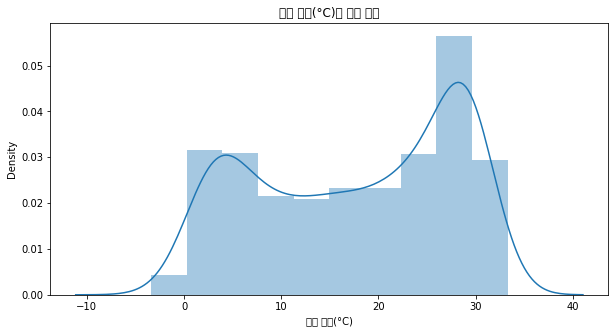

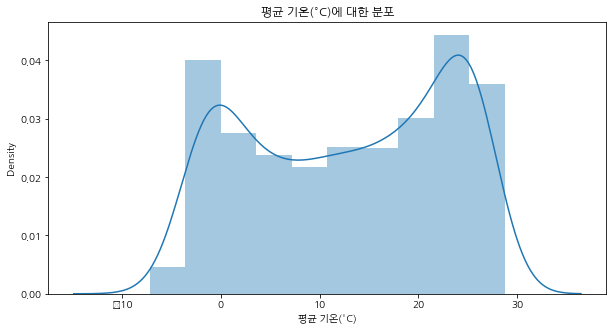

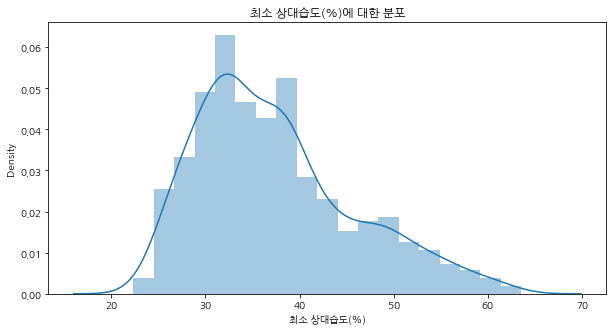

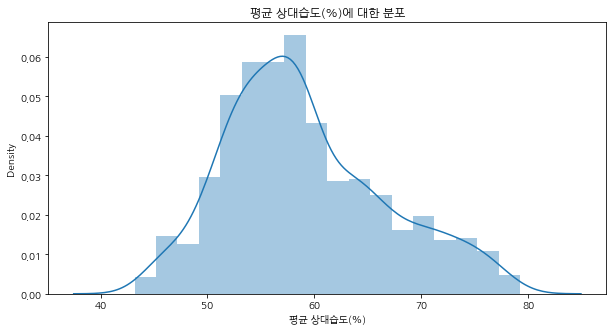

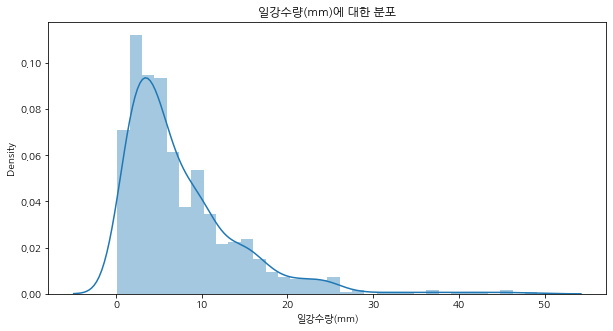

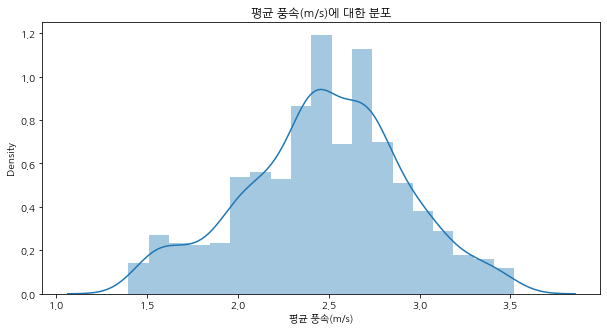

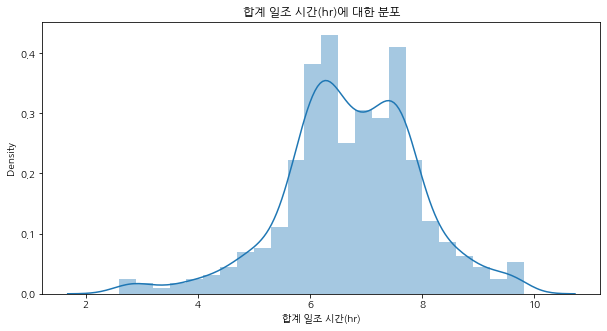

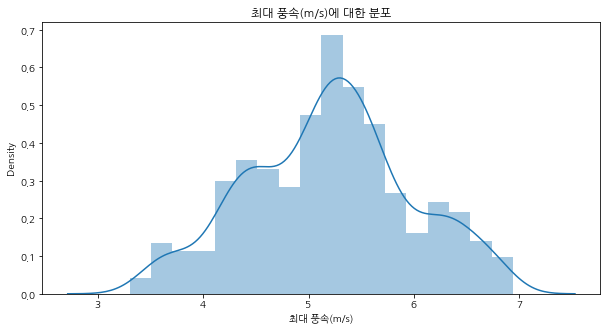

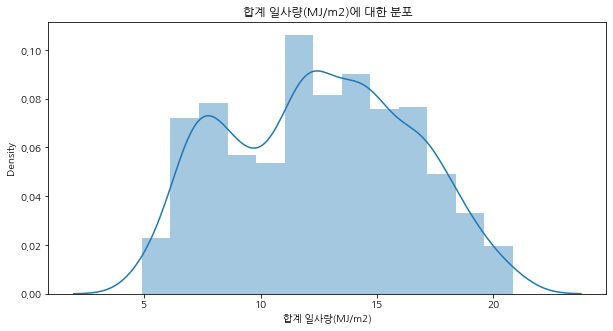

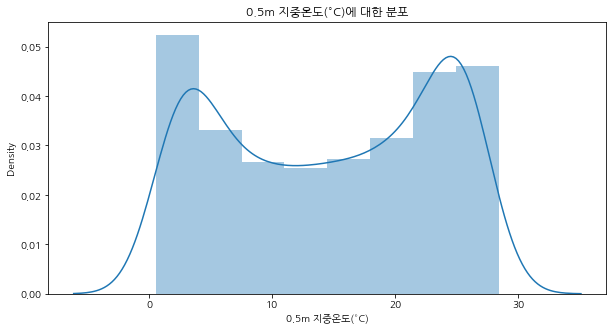

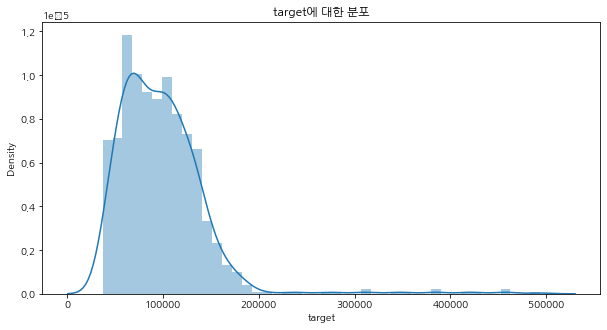

In [16]:
check_distribution(data = train_add, column_list = train_add.columns)

In [17]:
train = train_add
test = test.drop(['month', 'date'], axis = 1)
X_train, y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_2 = model.score(X_test, y_test)

print('rmse : ', rmse)
print('r2 : ', r_2)

[07:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse :  73140.35136305832
r2 :  -0.7752423232782757


#창덕궁

In [19]:
창덕궁 = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/ChangDeokGung.csv')

In [20]:
창덕궁 = 창덕궁.rename(columns = {'창덕궁' : 'target'})
train = 창덕궁[창덕궁['date'] < 201901]
test = 창덕궁[창덕궁['date'] >= 201901]

In [21]:
train_add = interpolation(data = 창덕궁, n_split = 100)
train_add = train_add[train_add['date'] < 201901]

In [22]:
train_add = train_add.drop(['date', 'month'], axis = 1).reset_index()
train_add = train_add.drop('index', axis = 1)
train_add['target'] = train_add['target'].apply(lambda x : int(x))

train = train_add
test = test.drop(['month', 'date'], axis = 1)
X_train, y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_2 = model.score(X_test, y_test)

print('rmse : ', rmse)
print('r2 : ', r_2)

[07:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse :  29766.389094921313
r2 :  0.6460802515788134


#창경궁

In [23]:
창경궁 = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/ChangGyeongGung.csv')
창경궁 = 창경궁.rename(columns = {'창경궁' : 'target'})
train = 창경궁[창경궁['date'] < 201901]
test = 창경궁[창경궁['date'] >= 201901]

train_add = interpolation(data = 창경궁, n_split = 100)
train_add = train_add[train_add['date'] < 201901]

train_add = train_add.drop(['date', 'month'], axis = 1).reset_index()
train_add = train_add.drop('index', axis = 1)
train_add['target'] = train_add['target'].apply(lambda x : int(x))

train = train_add
test = test.drop(['month', 'date'], axis = 1)
X_train, y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_2 = model.score(X_test, y_test)

print('rmse : ', rmse)
print('r2 : ', r_2)

[07:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse :  18967.585899205915
r2 :  0.46970841312691325


# 경복궁

In [24]:
df = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/GyeongBokGung.csv')
df = df.rename(columns = {'경복궁' : 'target'})
train = df[df['date'] < 201901]
test = df[df['date'] >= 201901]

train_add = interpolation(data = df, n_split = 100)
train_add = train_add[train_add['date'] < 201901]

train_add = train_add.drop(['date', 'month'], axis = 1).reset_index()
train_add = train_add.drop('index', axis = 1)
train_add['target'] = train_add['target'].apply(lambda x : int(x))

train = train_add
test = test.drop(['month', 'date'], axis = 1)
X_train, y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_2 = model.score(X_test, y_test)

print('rmse : ', rmse)
print('r2 : ', r_2)

[07:52:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse :  87783.11975434424
r2 :  0.22124434489777856


#헌릉인릉

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/HeonLeungInReung.csv')
df = df.rename(columns = {df.columns[-1] : 'target'})
train = df[df['date'] < 201901]
test = df[df['date'] >= 201901]

train_add = interpolation(data = df, n_split = 100)
train_add = train_add[train_add['date'] < 201901]

train_add = train_add.drop(['date', 'month'], axis = 1).reset_index()
train_add = train_add.drop('index', axis = 1)
train_add['target'] = train_add['target'].apply(lambda x : int(x))

train = train_add
test = test.drop(['month', 'date'], axis = 1)
X_train, y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_2 = model.score(X_test, y_test)

print('rmse : ', rmse)
print('r2 : ', r_2)

[07:52:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse :  1523.5089431911497
r2 :  0.4548286822490037


# 종묘

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/JongMyo.csv')
df = df.rename(columns = {df.columns[-1] : 'target'})
train = df[df['date'] < 201901]
test = df[df['date'] >= 201901]

train_add = interpolation(data = df, n_split = 100)
train_add = train_add[train_add['date'] < 201901]

train_add = train_add.drop(['date', 'month'], axis = 1).reset_index()
train_add = train_add.drop('index', axis = 1)
train_add['target'] = train_add['target'].apply(lambda x : int(x))

train = train_add
test = test.drop(['month', 'date'], axis = 1)
X_train, y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_2 = model.score(X_test, y_test)

print('rmse : ', rmse)
print('r2 : ', r_2)

[07:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse :  11158.584645538685
r2 :  -0.07573801010416137


# 남산골 한옥마을

In [27]:
df = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/NamSanGolHanOkVillage.csv')
df = df.rename(columns = {df.columns[-1] : 'target'})
train = df[df['date'] < 201901]
test = df[df['date'] >= 201901]

train_add = interpolation(data = df, n_split = 100)
train_add = train_add[train_add['date'] < 201901]

train_add = train_add.drop(['date', 'month'], axis = 1).reset_index()
train_add = train_add.drop('index', axis = 1)
train_add['target'] = train_add['target'].apply(lambda x : int(x))

train = train_add
test = test.drop(['month', 'date'], axis = 1)
X_train, y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_2 = model.score(X_test, y_test)

print('rmse : ', rmse)
print('r2 : ', r_2)

[07:54:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse :  28491.791034485635
r2 :  0.37952430096905043
